<a href="https://colab.research.google.com/github/Sairaj-97/Machine-Learning/blob/main/SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM Classifier

Equation of the Hyperplane:

y = wx - b

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

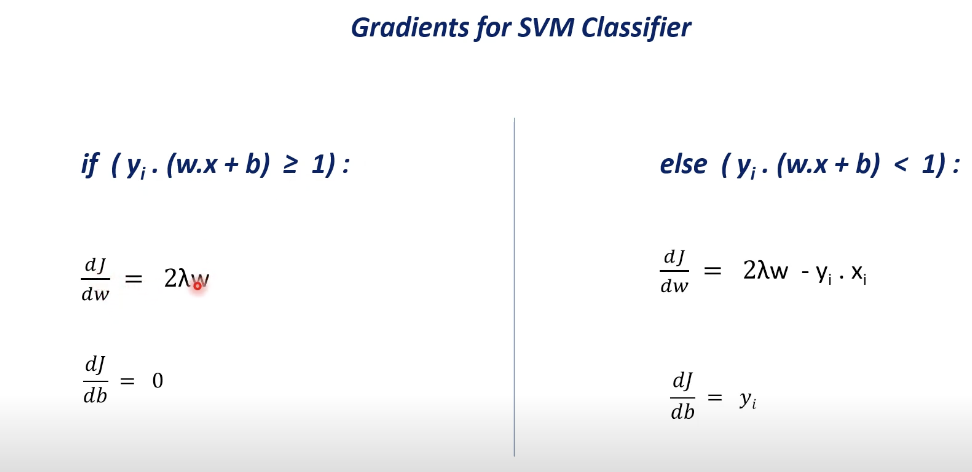

In [1]:
import numpy as np

In [2]:
class SVM_classifier():
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_label=np.where(self.Y<=0,-1,1)

    for index,x_i in enumerate(self.X):
      condition=(y_label[index]*(np.dot(x_i,self.w)-self.b))>=1

      if condition==True:
        dw = 2*self.lambda_parameter*self.w
        db=0
      else:
        dw = 2*self.lambda_parameter*self.w - np.dot(x_i,y_label[index])
        db = y_label[index]

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self, X):
    output=np.dot(X,self.w)-self.b
    predicted_labels=np.sign(output)
    y_hat=np.where(predicted_labels<=-1,0,1)
    return y_hat

Using the above class to predict diabetic patients

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
diabetes=pd.read_csv('/content/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


splitting data into target and features

In [7]:
features=diabetes.drop(columns='Outcome', axis=1)
target=diabetes["Outcome"]

Data Standardization

In [10]:
scaler=StandardScaler()
std_features=scaler.fit_transform(features)

spliting test and train data


In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(std_features,target,test_size=0.2,random_state=2)

training the model

In [33]:
svm=SVM_classifier(learning_rate=0.001,no_of_iterations=5000,lambda_parameter=0.01)
svm.fit(X_train,Y_train)


checing accuracy of training data

In [34]:
predicted_train=svm.predict(X_train)
accuracy_train=accuracy_score(Y_train,predicted_train)
print(accuracy_train)

0.6693811074918566


checking acc for test data

In [35]:
predicted_test=svm.predict(X_test)
accuracy_test=accuracy_score(Y_test,predicted_test)
print(accuracy_test)

0.6233766233766234
